# Anomaly Detection

Detecting outliers using Isolation Forest, One-Class SVM, and Local Outlier Factor.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 5)
np.random.seed(42)

---
## Generate Data with Anomalies

Total samples: 320
Normal: 300, Anomalies: 20


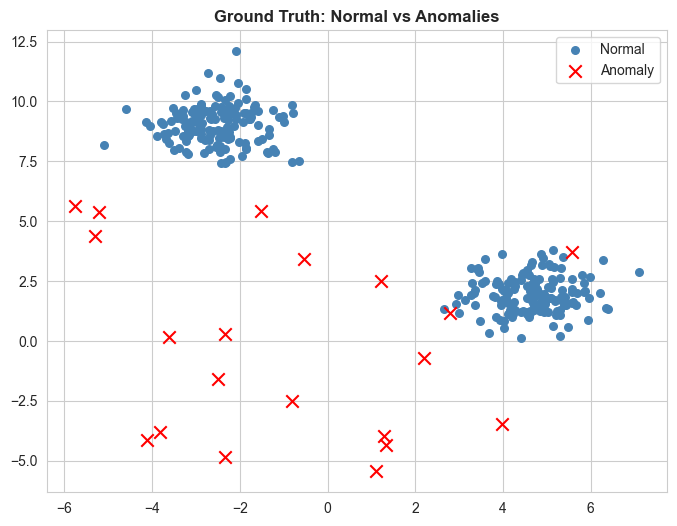

In [2]:
# Normal data (clusters)
X_normal, _ = make_blobs(n_samples=300, centers=2, cluster_std=0.8, random_state=42)

# Anomalies (random outliers)
n_anomalies = 20
X_anomalies = np.random.uniform(low=-6, high=6, size=(n_anomalies, 2))

# Combine
X = np.vstack([X_normal, X_anomalies])
y_true = np.array([1]*300 + [-1]*n_anomalies)  # 1=normal, -1=anomaly

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f'Total samples: {len(X)}')
print(f'Normal: {sum(y_true == 1)}, Anomalies: {sum(y_true == -1)}')

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X[y_true == 1, 0], X[y_true == 1, 1], c='steelblue', s=30, label='Normal')
plt.scatter(X[y_true == -1, 0], X[y_true == -1, 1], c='red', s=80, marker='x', label='Anomaly')
plt.title('Ground Truth: Normal vs Anomalies', fontweight='bold')
plt.legend()
plt.show()

---
## Method 1: Isolation Forest

In [3]:
# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
y_pred_iso = iso_forest.fit_predict(X_scaled)

# Calculate accuracy
accuracy_iso = (y_pred_iso == y_true).mean()
print(f'Isolation Forest Accuracy: {accuracy_iso:.1%}')
print(f'Detected anomalies: {sum(y_pred_iso == -1)}')
print(f'Actual anomalies: {sum(y_true == -1)}')

Isolation Forest Accuracy: 97.5%
Detected anomalies: 16
Actual anomalies: 20


---
## Method 2: One-Class SVM

In [4]:
# Fit One-Class SVM
oc_svm = OneClassSVM(nu=0.05, kernel='rbf', gamma='auto')
y_pred_svm = oc_svm.fit_predict(X_scaled)

# Calculate accuracy
accuracy_svm = (y_pred_svm == y_true).mean()
print(f'One-Class SVM Accuracy: {accuracy_svm:.1%}')
print(f'Detected anomalies: {sum(y_pred_svm == -1)}')
print(f'Actual anomalies: {sum(y_true == -1)}')

One-Class SVM Accuracy: 94.7%
Detected anomalies: 15
Actual anomalies: 20


---
## Method 3: Local Outlier Factor

In [5]:
# Fit LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred_lof = lof.fit_predict(X_scaled)

# Calculate accuracy
accuracy_lof = (y_pred_lof == y_true).mean()
print(f'Local Outlier Factor Accuracy: {accuracy_lof:.1%}')
print(f'Detected anomalies: {sum(y_pred_lof == -1)}')
print(f'Actual anomalies: {sum(y_true == -1)}')

Local Outlier Factor Accuracy: 98.1%
Detected anomalies: 16
Actual anomalies: 20


---
## Compare All Methods

C:\Users\Sreekar\AppData\Local\Temp\ipykernel_1036\466815231.py:21: UserWarning: You passed both c and facecolor/facecolors for the markers. c has precedence over facecolor/facecolors. This behavior may change in the future.
  ax.scatter(X[missed, 0], X[missed, 1], c='orange', s=100, marker='o',


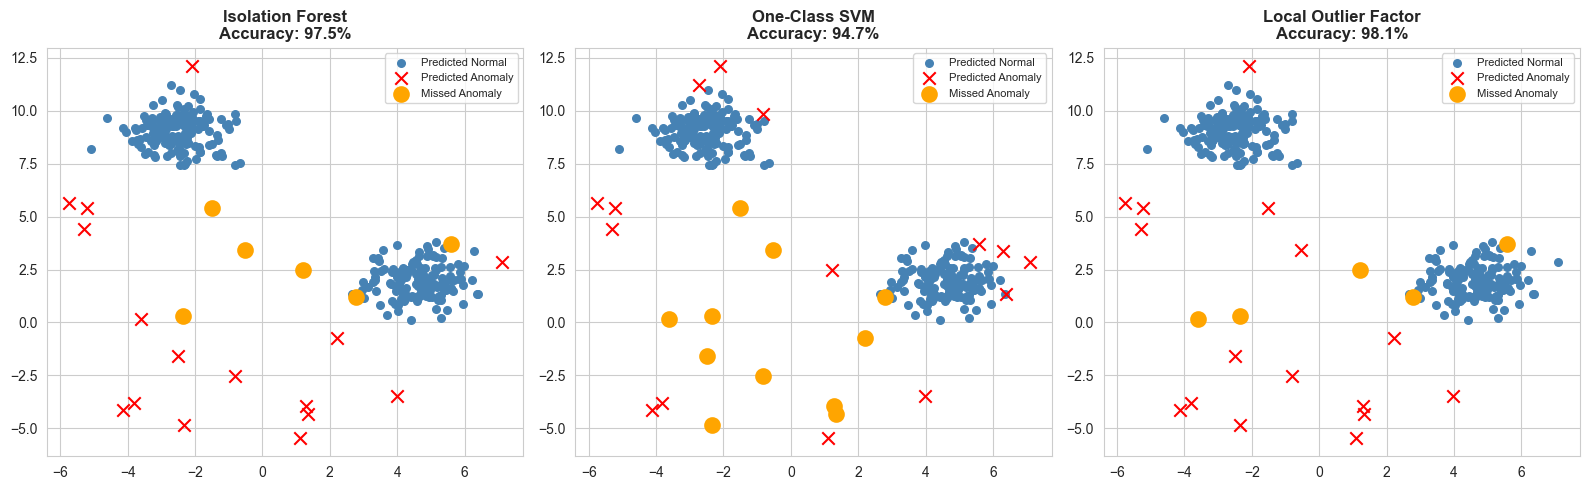

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

methods = [
    ('Isolation Forest', y_pred_iso),
    ('One-Class SVM', y_pred_svm),
    ('Local Outlier Factor', y_pred_lof)
]

for ax, (name, y_pred) in zip(axes, methods):
    # Plot normal points
    normal_mask = y_pred == 1
    ax.scatter(X[normal_mask, 0], X[normal_mask, 1], c='steelblue', s=30, label='Predicted Normal')
    
    # Plot detected anomalies
    anomaly_mask = y_pred == -1
    ax.scatter(X[anomaly_mask, 0], X[anomaly_mask, 1], c='red', s=80, marker='x', label='Predicted Anomaly')
    
    # Mark true anomalies that were missed
    missed = (y_true == -1) & (y_pred == 1)
    if any(missed):
        ax.scatter(X[missed, 0], X[missed, 1], c='orange', s=100, marker='o', 
                  facecolors='none', linewidths=2, label='Missed Anomaly')
    
    accuracy = (y_pred == y_true).mean()
    ax.set_title(f'{name}\nAccuracy: {accuracy:.1%}', fontweight='bold')
    ax.legend(loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()

---
## Anomaly Scores Visualization

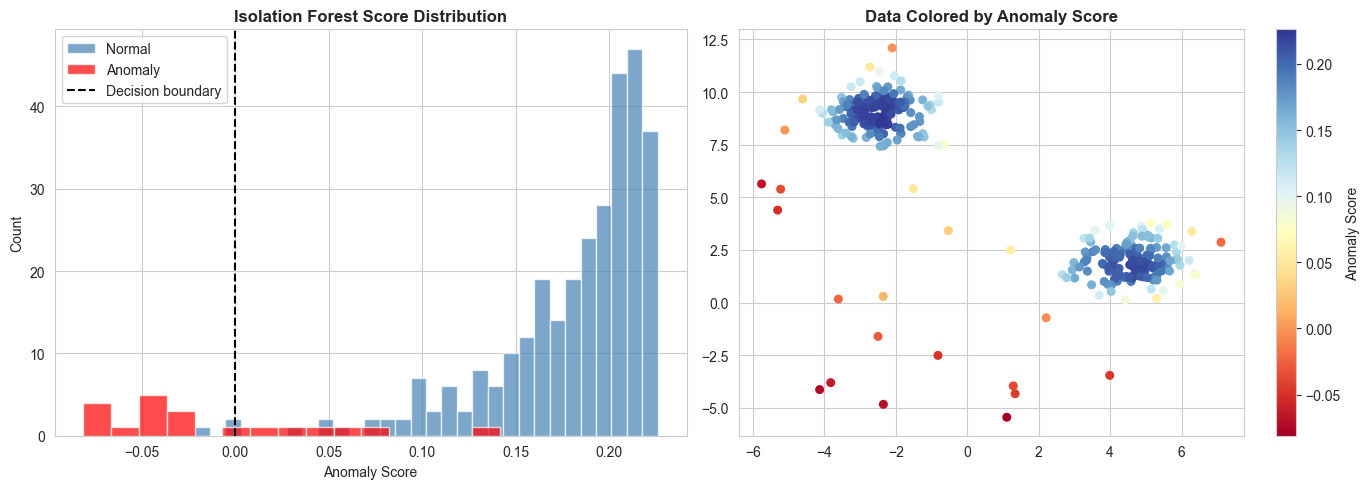

In [7]:
# Get anomaly scores from Isolation Forest
scores = iso_forest.decision_function(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Score distribution
axes[0].hist(scores[y_true == 1], bins=30, alpha=0.7, label='Normal', color='steelblue')
axes[0].hist(scores[y_true == -1], bins=15, alpha=0.7, label='Anomaly', color='red')
axes[0].axvline(x=0, color='black', linestyle='--', label='Decision boundary')
axes[0].set_xlabel('Anomaly Score')
axes[0].set_ylabel('Count')
axes[0].set_title('Isolation Forest Score Distribution', fontweight='bold')
axes[0].legend()

# Scatter colored by score
scatter = axes[1].scatter(X[:, 0], X[:, 1], c=scores, cmap='RdYlBu', s=30)
plt.colorbar(scatter, ax=axes[1], label='Anomaly Score')
axes[1].set_title('Data Colored by Anomaly Score', fontweight='bold')

plt.tight_layout()
plt.show()

---
## Summary

**Key Points:**
- Anomaly detection identifies rare, unusual data points
- Isolation Forest works by isolating anomalies with random splits
- One-Class SVM learns a boundary around normal data
- LOF compares local density to neighbors
- Choice depends on data size, dimensionality, and interpretability needs

**Key Point:** "Anomaly detection is often unsupervised or semi-supervised. The key challenge is that anomalies are rare and diverse, so methods must generalize to unknown anomaly types."

In [8]:
print('\nNotebook completed successfully.')


Notebook completed successfully.
